In [1]:
import sys
sys.executable

'/Users/vmamedov/.pyenv/versions/3.9.18/bin/python3.9'

In [46]:
import pandas as pd
train_df = pd.read_csv('/Users/vmamedov/Desktop/banzai-hack/video-tagger/data/train_dataset_tag_video/baseline/train_data_categories.csv')

In [47]:
train_df.head(2)[['video_id', 'tags']]

,video_id,tags
0,9007f33c8347924ffa12f922da2a179d,Массовая культура: Юмор и сатира
1,9012707c45233bd601dead57bc9e2eca,События и достопримечательности: Спортивные с...


In [48]:
train_df.dropna(subset=('tags'), inplace=True)

In [49]:
import re


def transform_dataframe(df):
    rows = []
    for _, row in df.iterrows():
        video_id = row['video_id']
        tags = row['tags'].split(', ')
        for tag in tags:
            levels = re.split(r':|\t', tag)
            while len(levels) < 3:
                levels.append('')
            rows.append([video_id] + levels)
    
    transformed_df = pd.DataFrame(rows, columns=['video_id', 'level1', 'level2', 'level3'])
    for l in ['level1', 'level2', 'level3']:
        transformed_df[l] = transformed_df[l].str.strip()
    return transformed_df


target_parsed_df = transform_dataframe(df=train_df)

In [109]:
target_parsed_df.groupby('video_id').count().max()


level1          4
level2          4
level3          4
empty_levels    4
dtype: int64

In [50]:
target_parsed_df[target_parsed_df.level1 == '']

,video_id,level1,level2,level3


In [60]:
target_parsed_df.query('level1 == "Массовая культура" and empty_levels == 2')

,video_id,level1,level2,level3,empty_levels
7,a00b145242be3ebc3b311455e94917af,Массовая культура,,,2
9,f02709d3f6b2fbd265863ef538b13c0a,Массовая культура,,,2
16,90203d59857ed1fbb1c3142aa1fe7714,Массовая культура,,,2
28,80586f50ab71963113896b9b6d01a5dc,Массовая культура,,,2
43,106bd13b84f390cce9d369571604ab75,Массовая культура,,,2
...,...,...,...,...,...
1520,2ef3ec7442459323bfb283992ffe001f,Массовая культура,,,2
1537,bfa50133c4316fea88c2175835f4f761,Массовая культура,,,2
1542,2f4bd0532525895de06ac9411287cc33,Массовая культура,,,2
1551,ff35fc896c5b93f1f0272bac7efb097c,Массовая культура,,,2


In [62]:
target_parsed_df.query('level1 == "Массовая культура" and empty_levels == 1')['level2'].unique()

array(['Юмор и сатира', 'Отношения знаменитостей',
       'Скандалы знаменитостей', 'Стиль знаменитостей',
       'Семьи знаменитостей'], dtype=object)

In [53]:
target_parsed_df.level1.unique()

array(['Массовая культура', 'События и достопримечательности',
       'Транспорт', 'Спорт', 'Изобразительное искусство',
       'Семья и отношения', 'Хобби и интересы', 'Религия и духовность',
       'Путешествия', 'Фильмы и анимация', 'Музыка и аудио',
       'Еда и напитки', 'Дом и сад', 'Бизнес и финансы', 'Телевидение',
       'Наука', 'Медицинские направления', 'Образование', 'Игры',
       'Новости и политика', 'Карьера', 'Стиль и красота',
       'Личные финансы', 'Информационные технологии', 'Недвижимость',
       'Книги и литература', 'Экономика', 'Игры и головоломки',
       'Компьютеры и цифровые технологии', 'Красота', 'Медицина',
       'Хобби и стиль', 'Отношения знаменитостей', 'Создание контента',
       'Здоровый образ жизни'], dtype=object)

In [54]:
target_parsed_df.value_counts(subset='level1').to_frame()

,count
level1,
Массовая культура,559
События и достопримечательности,131
Спорт,109
Карьера,104
Религия и духовность,78
Еда и напитки,76
Путешествия,74
Музыка и аудио,66
Хобби и интересы,59


In [55]:
target_parsed_df.groupby(['level1', 'level2'])['video_id'].count().to_frame()

video_id
level1           level2                                
Бизнес и финансы Бизнес                               4
                 Промышленность и сфера услуг         5
                 Экономика                            1
Дом и сад                                             1
                 Дизайн интерьера                    24
...                                                 ...
Хобби и интересы Музыкальные инструменты              1
                 Паранормальные явления               1
                 Создание контента                    7
Хобби и стиль                                         1
Экономика        Валюты                               1

[121 rows x 1 columns]

In [66]:
pd.set_option('display.max_rows', 100)
target_parsed_df['empty_levels'] = target_parsed_df.apply(lambda row: int(row['level2'] == '') + int(row['level3'] == ''), axis=1)
tmp = target_parsed_df.groupby(['level1', 'empty_levels'])['video_id'].count().to_frame() #.sort_values('video_id'), ascending=False)
tmp

video_id
level1                           empty_levels          
Бизнес и финансы                 0                    1
                                 1                    9
Дом и сад                        1                   27
                                 2                    1
Еда и напитки                    1                   76
Здоровый образ жизни             2                    1
Игры                             0                    1
                                 1                    8
Игры и головоломки               1                    1
Изобразительное искусство        1                   10
                                 2                    8
Информационные технологии        0                    1
                                 1                    1
                                 2                    4
Карьера                          2                  104
Книги и литература               1                    3
                                 2                    1
Компьютеры и цифровые технологии 2                    1
Красота                          1                    1
Личные финансы                   0                    2
                                 2                   17
Массовая культура                0                    2
                                 1                  300
                                 2                  257
Медицина                         0                    2
Медицинские направления          1                    2
Музыка и аудио                   0                    2
                                 1                   40
                                 2                   24
Наука                            1                   15
                                 2                    8
Недвижимость                     1                    3
Новости и политика               1                    4
                                 2                    7
Образование                      1                   14
                                 2                    2
Отношения знаменитостей          1                    1
Путешествия                      0                   10
                                 1                    6
                                 2                   58
Религия и духовность             1                   78
Семья и отношения                0                    2
                                 1                    7
                                 2                   41
События и достопримечательности  0                    3
                                 1                  123
                                 2                    5
Создание контента                1                    1
Спорт                            0                    2
                                 1                   77
                                 2                   30
Стиль и красота                  0                    2
                                 1                   10
                                 2                    5
Телевидение                      1                    2
Транспорт                        0                    3
                                 1                    6
                                 2                   49
Фильмы и анимация                1                   32
                                 2                    2
Хобби и интересы                 0                   13
                                 1                   26
                                 2                   20
Хобби и стиль                    2                    1
Экономика                        1                    1

In [ ]:
# уровень для категории можно не предсказывать, если доля семплов относительно уровня выше меньше 5-10% (или меньше 2-х семплов)

In [88]:
tmp.reset_index().query('level1 == "События и достопримечательности"')
# target_parsed_df

,level1,empty_levels,video_id
44,События и достопримечательности,0,3
45,События и достопримечательности,1,123
46,События и достопримечательности,2,5


In [78]:
# print(target_parsed_df.tail(3).reset_index(drop=True).to_markdown())
print(tmp.head(5).reset_index().to_markdown())

|    | level1           |   empty_levels |   video_id |
|---:|:-----------------|---------------:|-----------:|
|  0 | Бизнес и финансы |              0 |          1 |
|  1 | Бизнес и финансы |              1 |          9 |
|  2 | Дом и сад        |              1 |         27 |
|  3 | Дом и сад        |              2 |          1 |
|  4 | Еда и напитки    |              1 |         76 |


In [87]:

def generate_unique_levels_dataframe(df, threshold=0.05, min_samples=2):
    # Подсчет уникальных комбинаций уровней
    unique_levels = df[['level1', 'level2', 'level3']].drop_duplicates()
    
    # Фильтрация уровней
    def filter_levels(column_name):
        counts = df[column_name].value_counts()
        total_samples = counts.sum()
        to_keep = counts[counts >= max(threshold * total_samples, min_samples)].index
        return to_keep
    
    level2_to_keep = filter_levels('level2')
    level3_to_keep = filter_levels('level3')
    
    # Фильтрация DataFrame с уникальными уровнями
    filtered_levels = unique_levels[
        (unique_levels['level2'].isin(level2_to_keep)) |
        (unique_levels['level3'].isin(level3_to_keep))
    ]
    
    return filtered_levels

result_df = generate_unique_levels_dataframe(target_parsed_df)
result_df.groupby('level1')['level2'].count().sort_values(ascending=False).to_frame()

,level2
level1,
События и достопримечательности,13
Музыка и аудио,8
Спорт,7
Стиль и красота,6
Наука,6
Хобби и интересы,6
Массовая культура,6
Путешествия,5
Дом и сад,5


In [103]:
result_df

,level1,level2,level3
0,Массовая культура,Юмор и сатира,
1,События и достопримечательности,Спортивные события,
3,Массовая культура,Отношения знаменитостей,
4,Массовая культура,Скандалы знаменитостей,
5,Транспорт,,
...,...,...,...
1516,Здоровый образ жизни,,
1517,Транспорт,Авторемонт,
1522,Музыка и аудио,Альтернативная музыка,
1528,Изобразительное искусство,Художественная фотография,


In [99]:
cat = "Массовая культура"
t = target_parsed_df.groupby(['level1', 'level2', 'level3'])['video_id'].count().to_frame()
t.query(f'level1 == "{cat}"')

video_id
level1            level2                  level3                       
Массовая культура                                                   257
                  Отношения знаменитостей                            19
                                          Семьи знаменитостей         1
                  Семьи знаменитостей                                 1
                  Скандалы знаменитостей                             11
                  Стиль знаменитостей                                 1
                                          Стиль знаменитостей         1
                  Юмор и сатира                                     268

In [102]:
t = result_df[['level1', 'level2', 'level3']].drop_duplicates()
t.query(f'level1 == "{cat}"')

,level1,level2,level3
0,Массовая культура,Юмор и сатира,
3,Массовая культура,Отношения знаменитостей,
4,Массовая культура,Скандалы знаменитостей,
7,Массовая культура,,
1408,Массовая культура,Стиль знаменитостей,
1427,Массовая культура,Семьи знаменитостей,


In [114]:
print(target_parsed_df.head().to_markdown())

|    | video_id                         | level1                          | level2                  | level3   |   empty_levels |
|---:|:---------------------------------|:--------------------------------|:------------------------|:---------|---------------:|
|  0 | 9007f33c8347924ffa12f922da2a179d | Массовая культура               | Юмор и сатира           |          |              1 |
|  1 | 9012707c45233bd601dead57bc9e2eca | События и достопримечательности | Спортивные события      |          |              1 |
|  2 | 9012707c45233bd601dead57bc9e2eca | Массовая культура               | Юмор и сатира           |          |              1 |
|  3 | e01d6ebabbc27e323fa1b7c581e9b96a | Массовая культура               | Отношения знаменитостей |          |              1 |
|  4 | e01d6ebabbc27e323fa1b7c581e9b96a | Массовая культура               | Скандалы знаменитостей  |          |              1 |


<Axes: >

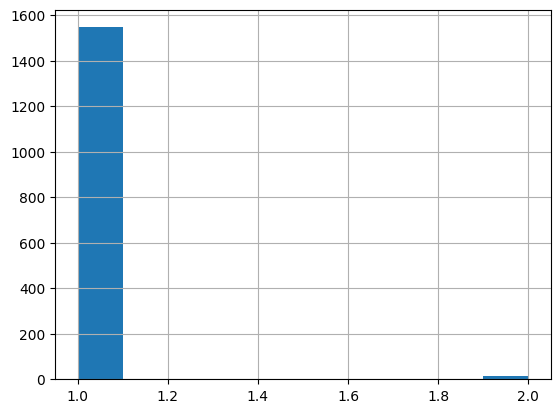

In [121]:
target_parsed_df.groupby(['video_id', 'level1',]).size().reset_index(name='count')['count'].hist()
